In [19]:
fieldMenDict = {1:"Alex Cruz", 2:"Hunter Wish", 3:"Terrell Couch", 4:"Alex Kronk", 5:"Cody Price",
               6:"Daylon Weddle", 7:"John Saylor", 8:"Ian Campbell", 9:"Dio Protopapadakis"}
# maps each digit (1-9) to a field man's name
regionsDict = {1:"West Coast", 2:"Great plains", 3:"Great lakes", 4:"Dev. East", 5:"Dev. West",
               6:"Northeast", 7:"Mid-Atlantic", 8:"Southeast", 9:"Southwest"}
# maps each digit (1-9) to a region

In [20]:
U = [
    [4, 3, 2, 8, 9, 7, 6, 5, 1],
    [4, 6, 5, 2, 3, 1, 9, 8, 7],
    [9, 5, 3, 8, 7, 1, 6, 2, 4],
    [8, 1, 4, 3, 2, 6, 5, 7, 9],
    [1, 6, 5, 3, 8, 4, 9, 7, 2],
    [9, 1, 2, 5, 4, 6, 7, 8, 3],
    [9, 4, 1, 5, 2, 7, 8, 6, 3],
    [9, 8, 7, 2, 1, 6, 4, 5, 3],
    [5, 3, 4, 2, 1, 8, 7, 9, 6]
    ]
# utility matrix representing field men's preferences
# entry u[i,j] represents the utility if candidate i is assigned to job j
max_value = 81
# value of objective function if each field man gets their most desired region
optimal_value = 73
# optimal value given by AMPL and TORA software
optimal_diff = max_value - optimal_value
# 'optimal_diff' is used below to reduce computation while searching for optimal solutions

In [21]:
"""
Function takes a row number (i = 0,1,...,8) and a column number (j = 0,1,...,8) 
and returns the corresponding value in the utility matrix Ureturns the value at entry (i,j) 
in Utility matrix (U)
"""
def getUtils(i,j):
    return U[i][j]

In [22]:
import itertools as it
# library of tools for efficient iteration

In [23]:
Permutations = []
# initializes list to hold all permutations
for item in it.permutations(regionsDict.keys(), len(regionsDict.keys())):
    Permutations.append(item)
    # tuples of length 9 of all possible orderings of the digits 1-9; no repeated elements
    # there should be 362,880 (9 factorial) permutations

In [24]:
Solutions = []
# initializes list for all possible solutions - will be list of lists
for i in range(len(Permutations)):
    Solutions.append(list(zip(fieldMenDict.keys(), Permutations[i])))
    # zips keys of fieldMenDict (1,2,...,9) with each permutation, then 
    # converts zip type to list type,
    # adds list to Solutions list

In [25]:
optimalSolutions = []
# initializes list to store solutions that give optimal value declared above
for i in range(len(Solutions)):
    tot_diff = 0
    # for each solution [(x1,y1),(x2,y2),...,(x9,y9)] in Solutions, 
    # initialize 'tot_diff' to 0 for that solution
    for j in range(len(fieldMenDict.keys())):
        # for each assignment (x,y), get utils of assignment
        for k in range(1):
            a = Solutions[i][j][k]
            # 'a' represents field man x in (x,y) where a = 1,2,...,9
            b = Solutions[i][j][k+1]
            # 'b' represents region y in (x,y) where b = 1,2,...,9
            tot_diff = tot_diff + (len(fieldMenDict.keys()) - getUtils(a-1, b-1))
            # running total difference away from max value
        if tot_diff > optimal_diff:
            # if the total difference for the solution given by 'i' grows greater than
            # the optimal difference, then the solution cannot be an optimal solution
            # as it has a less than optimal value
            break
            # break from iterating through current solution ('i') and move to next solution 
            # in Solutions
    if tot_diff <= optimal_diff:
        optimalSolutions.append(Solutions[i])
        # 'Solutions[i]' is the solution [(x1,y1),(x2,y2),...,(x9,y9)] at index 'i'
        # 'optimalSolutions' is a list of lists of tuples

There are 8 solutions that give the optimal value of 73.

1
Alex Cruz : Dev. West : 9
Hunter Wish : Great plains : 6
Terrell Couch : Dev. East : 8
Alex Kronk : Southwest : 9
Cody Price : Mid-Atlantic : 9
Daylon Weddle : West Coast : 9
John Saylor : Northeast : 7
Ian Campbell : Great lakes : 7
Dio Protopapadakis : Southeast : 9


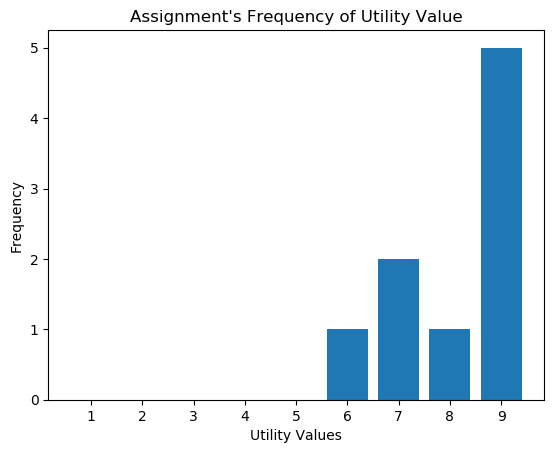


2
Alex Cruz : Dev. West : 9
Hunter Wish : Great plains : 6
Terrell Couch : Dev. East : 8
Alex Kronk : Southwest : 9
Cody Price : Mid-Atlantic : 9
Daylon Weddle : Southeast : 8
John Saylor : West Coast : 9
Ian Campbell : Great lakes : 7
Dio Protopapadakis : Northeast : 8


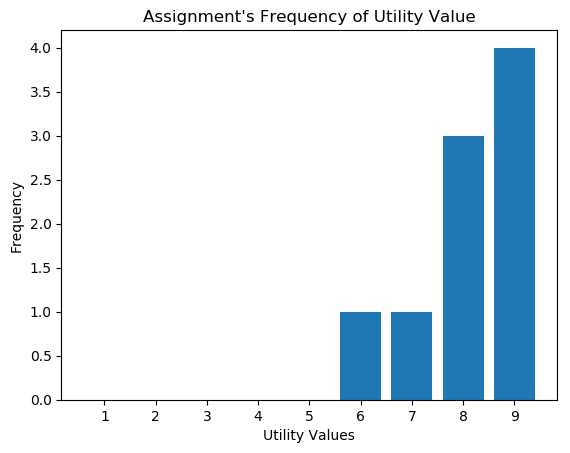


3
Alex Cruz : Dev. West : 9
Hunter Wish : Great lakes : 5
Terrell Couch : Dev. East : 8
Alex Kronk : Southwest : 9
Cody Price : Mid-Atlantic : 9
Daylon Weddle : West Coast : 9
John Saylor : Northeast : 7
Ian Campbell : Great plains : 8
Dio Protopapadakis : Southeast : 9


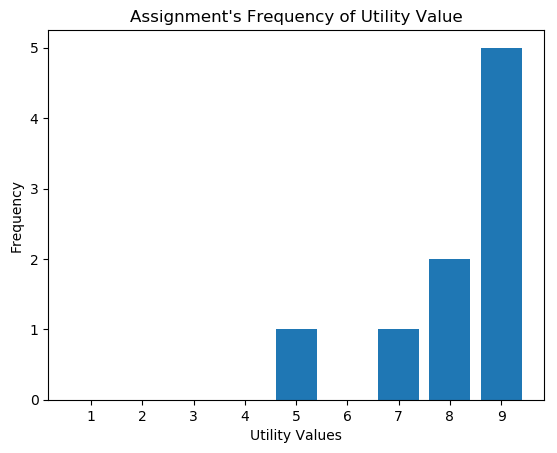


4
Alex Cruz : Dev. West : 9
Hunter Wish : Great lakes : 5
Terrell Couch : Dev. East : 8
Alex Kronk : Southwest : 9
Cody Price : Mid-Atlantic : 9
Daylon Weddle : Southeast : 8
John Saylor : West Coast : 9
Ian Campbell : Great plains : 8
Dio Protopapadakis : Northeast : 8


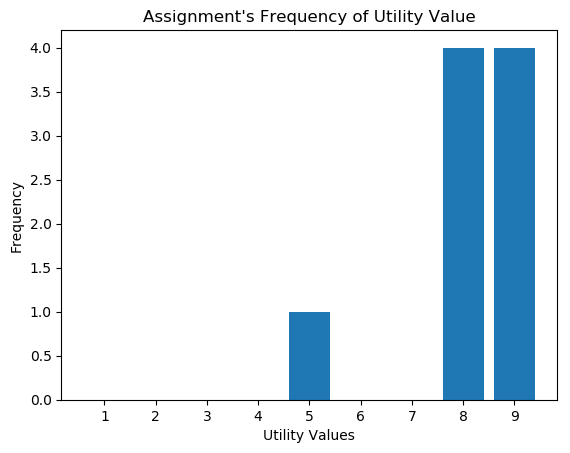


5
Alex Cruz : Dev. West : 9
Hunter Wish : Mid-Atlantic : 9
Terrell Couch : Dev. East : 8
Alex Kronk : Southwest : 9
Cody Price : Great plains : 6
Daylon Weddle : West Coast : 9
John Saylor : Northeast : 7
Ian Campbell : Great lakes : 7
Dio Protopapadakis : Southeast : 9


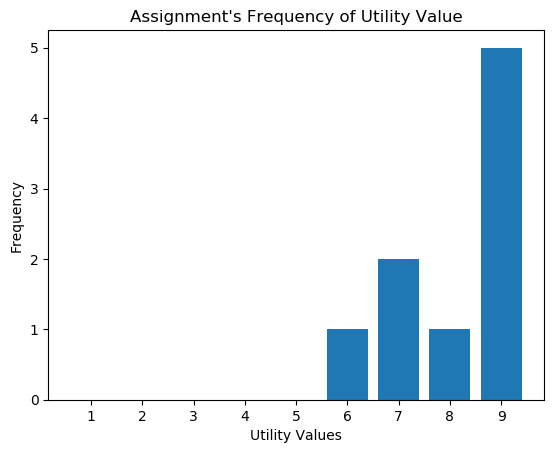


6
Alex Cruz : Dev. West : 9
Hunter Wish : Mid-Atlantic : 9
Terrell Couch : Dev. East : 8
Alex Kronk : Southwest : 9
Cody Price : Great plains : 6
Daylon Weddle : Southeast : 8
John Saylor : West Coast : 9
Ian Campbell : Great lakes : 7
Dio Protopapadakis : Northeast : 8


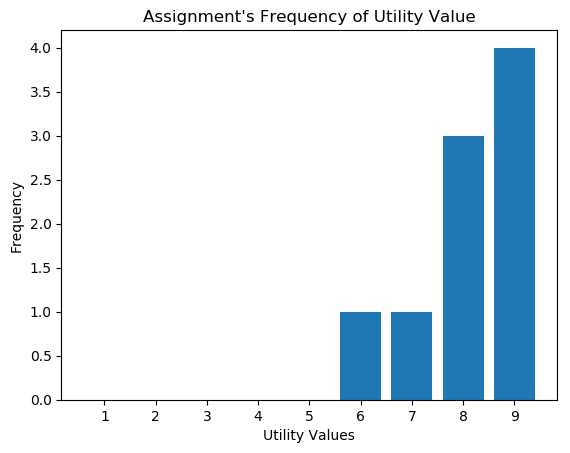


7
Alex Cruz : Dev. West : 9
Hunter Wish : Mid-Atlantic : 9
Terrell Couch : Dev. East : 8
Alex Kronk : Southwest : 9
Cody Price : Great lakes : 5
Daylon Weddle : West Coast : 9
John Saylor : Northeast : 7
Ian Campbell : Great plains : 8
Dio Protopapadakis : Southeast : 9


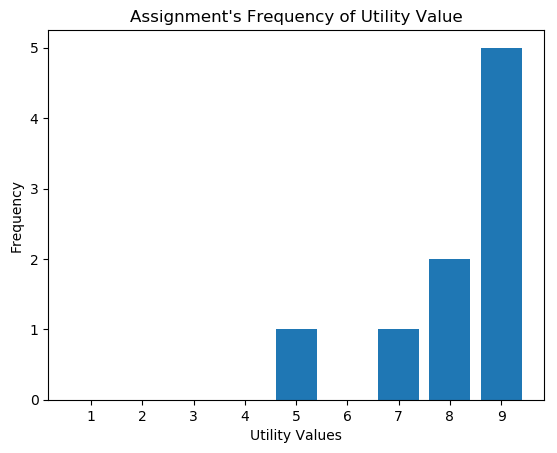


8
Alex Cruz : Dev. West : 9
Hunter Wish : Mid-Atlantic : 9
Terrell Couch : Dev. East : 8
Alex Kronk : Southwest : 9
Cody Price : Great lakes : 5
Daylon Weddle : Southeast : 8
John Saylor : West Coast : 9
Ian Campbell : Great plains : 8
Dio Protopapadakis : Northeast : 8


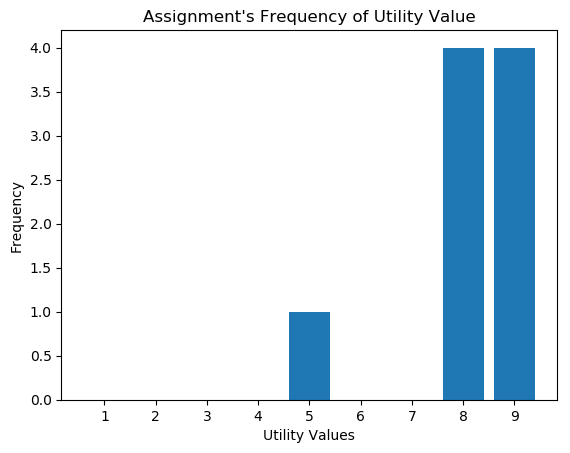

In [88]:
import numpy as np
import matplotlib.pyplot as plt
# tools for data visualization

print("There are " + str(len(optimalSolutions)) + " solutions that give the optimal value of " +
      str(optimal_value) + ".\n")
# displays number of solutions the give optimal value

for i in range(len(optimalSolutions)):
    print(i+1)  # displays an index for each solution
    utilsList = [] 
    # list to store utility values for each assignment in solution
    freqDict = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0} 
    # dictionary to count frequency within a solution
    
    for j in range(len(fieldMenDict.keys())):
        # for each assignment (x,y), display value corresponding to key 'x' and key 'y'
        # 'x' is the key for fieldMenDict, 'y' is the key for regionsDict
        for k in range(1):
            print(fieldMenDict[optimalSolutions[i][j][k]], ":", 
                  regionsDict[optimalSolutions[i][j][k+1]], end=" : ")
            # display field man name and assigned region
        a = optimalSolutions[i][j][k]
        # 'a' represents field man x in (x,y) where a = 1,2,...,9
        b = optimalSolutions[i][j][k+1]
        # 'b' represents region y in (x,y) where b = 1,2,...,9
        utils = getUtils(a-1, b-1)
        utilsList.append(utils)
        print(utils)
        # display utils given by assignment
    
    for num in utilsList:
        freqDict[num] += 1
        # frequency counter loop
        
    index = np.arange(len(freqDict)) # x-axis range ([0,1,...,8])
    freq = freqDict.values() # y-values in an (x,y) pair 
    plt.bar(index, freq, align='center', alpha=1) # alpha has to do with color of bars
    plt.xticks(index, freqDict.keys()) # replaces index with freqDict.keys()
    plt.xlabel("Utility Values")
    plt.ylabel("Frequency")
    plt.title("Assignment's Frequency of Utility Value")
    plt.show()
    print()